In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import itertools
import pgeocode
import plotly.express as px

sns.set(rc={'figure.figsize':(20,10)})

In [22]:
mapping_df = pd.read_csv("../data/movielens_to_imdb_mapping.csv").dropna()
title_to_imdb_id = {
    title: imdb_id for _, title, imdb_id in mapping_df.itertuples()
}
imdb_id_to_title = {imdb_id: title for title, imdb_id in title_to_imdb_id.items()}
imdb_id_to_title

{'tt0073486': "One Flew Over the Cuckoo's Nest (1975)",
 'tt0116683': 'James and the Giant Peach (1996)',
 'tt0058385': 'My Fair Lady (1964)',
 'tt0195685': 'Erin Brockovich (2000)',
 'tt0120623': "Bug's Life, A (1998)",
 'tt0093779': 'Princess Bride, The (1987)',
 'tt0052618': 'Ben-Hur (1959)',
 'tt0085334': 'Christmas Story, A (1983)',
 'tt0029583': 'Snow White and the Seven Dwarfs (1937)',
 'tt0032138': 'Wizard of Oz, The (1939)',
 'tt0101414': 'Beauty and the Beast (1991)',
 'tt0051658': 'Gigi (1958)',
 'tt0039628': 'Miracle on 34th Street (1947)',
 'tt0091042': "Ferris Bueller's Day Off (1986)",
 'tt0059742': 'Sound of Music, The (1965)',
 'tt0080339': 'Airplane! (1980)',
 'tt0120855': 'Tarzan (1999)',
 'tt0034492': 'Bambi (1942)',
 'tt0099077': 'Awakenings (1990)',
 'tt0094737': 'Big (1988)',
 'tt0120789': 'Pleasantville (1998)',
 'tt0088763': 'Back to the Future (1985)',
 'tt0108052': "Schindler's List (1993)",
 'tt0119643': 'Meet Joe Black (1998)',
 'tt0114148': 'Pocahontas (19

In [23]:
# Что мы можем визуализировать по данным?
# - Топ популярных фильмов - самые залайканные фильмы
# - Топ стран - нет такой инфы
# - Топ актеров, режиссером
# - Топ жанров фильмов

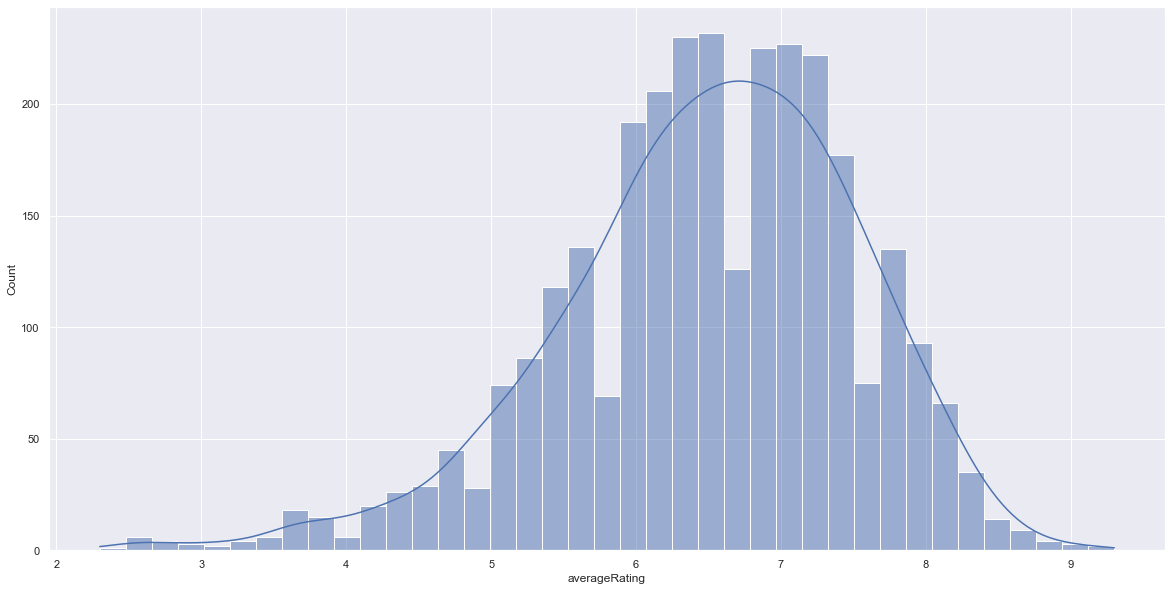

Possibly we can drop films with rating < 4 - because we will never recommend them to users


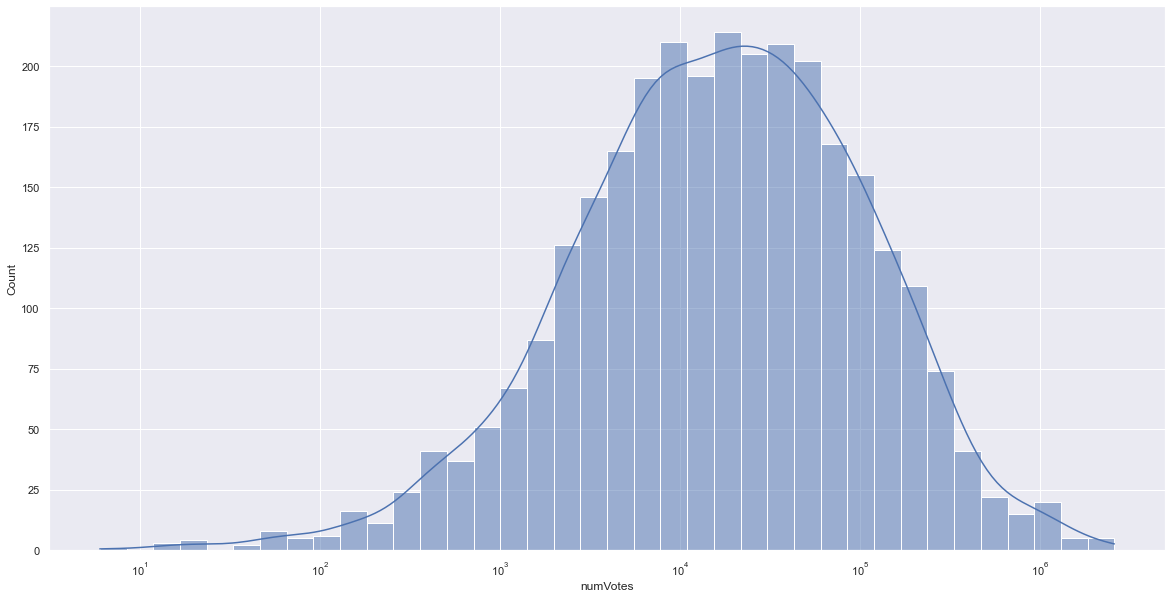

We should carefully recommend films to users - possible we also can not recommend films with low number of ratings


In [24]:
# Firms country distribution
title_ratings = pd.read_csv("../data/imdb/title.ratings.tsv", sep='\t', low_memory=False)
title_ratings = title_ratings[title_ratings.tconst.isin(imdb_id_to_title)]
title_ratings = title_ratings.sort_values(by='averageRating', ascending=False)
sns.histplot(title_ratings.averageRating, kde=True)
plt.show()
print("Possibly we can drop films with rating < 4 - because we will never recommend them to users")


sns.histplot(title_ratings.sort_values(by='numVotes').numVotes, kde=True, log_scale=True)
plt.show()
print("We should carefully recommend films to users - possible we also can not recommend films with low number of ratings")

In [25]:
print("Top ten films with highest average ratings:")
for _, row in title_ratings[:10].iterrows():
    print(f"Film: {imdb_id_to_title[row.tconst]}, average rating: {row.averageRating} , count votes: {row.numVotes}")

print("-" * 20)
print("Top ten films with lowest average ratings:")
for _, row in title_ratings.sort_values(by='averageRating')[:10].iterrows():
    print(f"Film: {imdb_id_to_title[row.tconst]}, average rating: {row.averageRating} , count votes: {row.numVotes}")

Top ten films with highest average ratings:
Film: Shawshank Redemption, The (1994), average rating: 9.3 , count votes: 2578898
Film: Godfather, The (1972), average rating: 9.2 , count votes: 1775537
Film: Schindler's List (1993), average rating: 9.0 , count votes: 1313248
Film: Godfather: Part II, The (1974), average rating: 9.0 , count votes: 1227619
Film: 12 Angry Men (1957), average rating: 9.0 , count votes: 761677
Film: Pulp Fiction (1994), average rating: 8.9 , count votes: 1978878
Film: Room with a View, A (1986), average rating: 8.8 , count votes: 35
Film: Fight Club (1999), average rating: 8.8 , count votes: 2029900
Film: Forrest Gump (1994), average rating: 8.8 , count votes: 1989509
Film: One Flew Over the Cuckoo's Nest (1975), average rating: 8.7 , count votes: 981290
--------------------
Top ten films with lowest average ratings:
Film: Theodore Rex (1995), average rating: 2.3 , count votes: 4547
Film: Lawnmower Man 2: Beyond Cyberspace (1996), average rating: 2.5 , count v

In [26]:
print("Top frequent voted films - approx. same list of films as in top ratings films")
for _, row in title_ratings.sort_values(by='numVotes',ascending=False)[:10].iterrows():
    print(f"Film: {imdb_id_to_title[row.tconst]}, average rating: {row.averageRating} , count votes: {row.numVotes}")

print("-" * 20)
print("Top not frequent voted films")
for _, row in title_ratings.sort_values(by='numVotes',ascending=True)[:10].iterrows():
    print(f"Film: {imdb_id_to_title[row.tconst]}, average rating: {row.averageRating} , count votes: {row.numVotes}")


Top frequent voted films - approx. same list of films as in top ratings films
Film: Shawshank Redemption, The (1994), average rating: 9.3 , count votes: 2578898
Film: Fight Club (1999), average rating: 8.8 , count votes: 2029900
Film: Forrest Gump (1994), average rating: 8.8 , count votes: 1989509
Film: Pulp Fiction (1994), average rating: 8.9 , count votes: 1978878
Film: Matrix, The (1999), average rating: 8.7 , count votes: 1854654
Film: Godfather, The (1972), average rating: 9.2 , count votes: 1775537
Film: Gladiator (2000), average rating: 8.5 , count votes: 1450461
Film: Silence of the Lambs, The (1991), average rating: 8.6 , count votes: 1381941
Film: Saving Private Ryan (1998), average rating: 8.6 , count votes: 1343174
Film: Schindler's List (1993), average rating: 9.0 , count votes: 1313248
--------------------
Top not frequent voted films
Film: Kidnapped (1960), average rating: 7.0 , count votes: 6
Film: Stranger, The (1994), average rating: 7.5 , count votes: 12
Film: Artemi

In [27]:
title_basics = pd.read_csv('../data/imdb/title.basics.tsv', sep='\t', low_memory=False)
title_basics = title_basics[title_basics.tconst.isin(imdb_id_to_title)]
title_basics.head(20)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
10279,tt0010418,movie,Male and Female,Male and Female,0,1919,\N,116,"Adventure,Drama"
12174,tt0012349,movie,The Kid,The Kid,0,1921,\N,68,"Comedy,Drama,Family"
15456,tt0015693,movie,Cobra,Cobra,0,1925,\N,70,"Drama,Romance"
15625,tt0015863,movie,Go West,Go West,0,1925,\N,69,"Comedy,Western"
15626,tt0015864,movie,The Gold Rush,The Gold Rush,0,1925,\N,95,"Adventure,Comedy,Drama"
16086,tt0016332,movie,Seven Chances,Seven Chances,0,1925,\N,56,"Comedy,Romance"
16381,tt0016630,movie,Battling Butler,Battling Butler,0,1926,\N,77,"Comedy,Sport"
16391,tt0016640,movie,The Bells,The Bells,0,1926,\N,68,"Crime,Drama,Horror"
17098,tt0017350,movie,The Scarlet Letter,The Scarlet Letter,0,1926,\N,115,Drama
17163,tt0017416,movie,The Son of the Sheik,The Son of the Sheik,0,1926,\N,68,"Adventure,Drama,Romance"


# Unique genres: 26
imdb genres: ['Action' 'Adventure' 'Animation' 'Biography' 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Family' 'Fantasy' 'Film-Noir' 'History' 'Horror'
 'Music' 'Musical' 'Mystery' 'News' 'Reality-TV' 'Romance' 'Sci-Fi'
 'Short' 'Sport' 'Thriller' 'War' 'Western' '\\N']


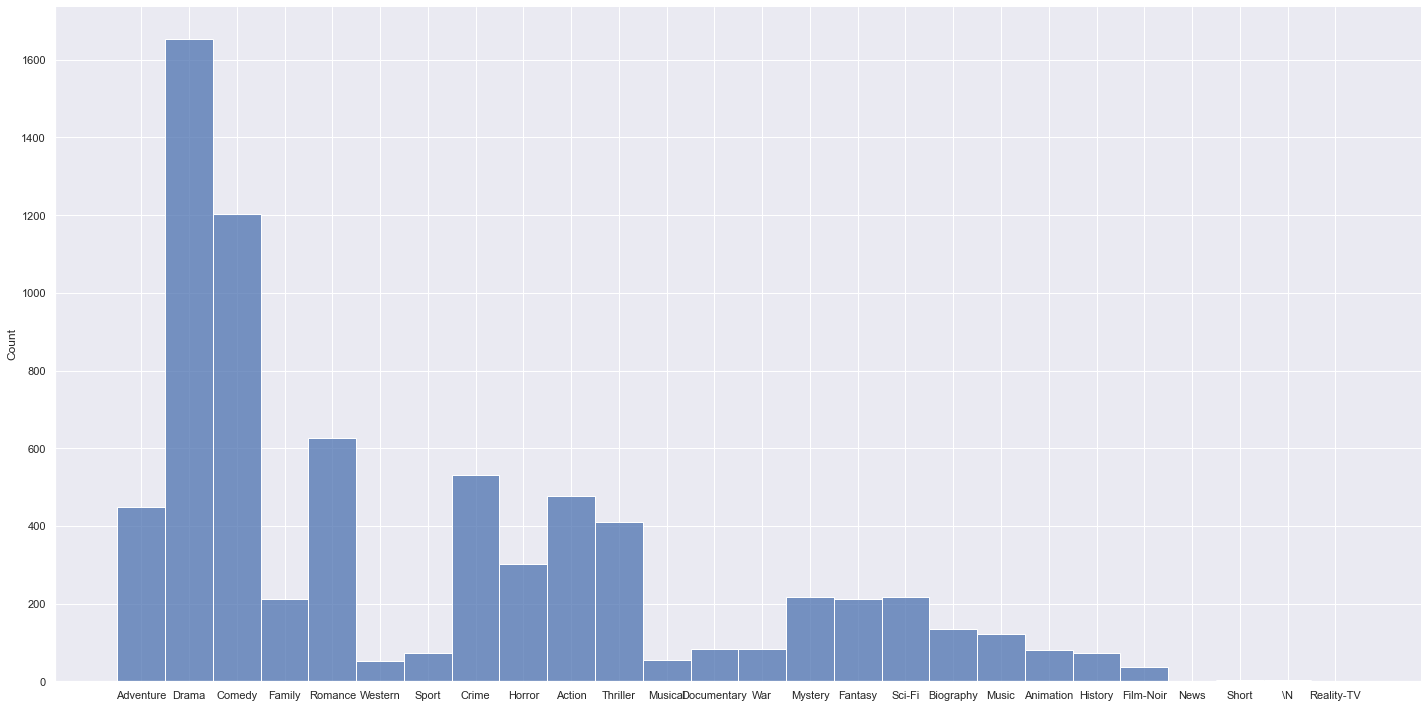

In [28]:
genres = list(itertools.chain(*[
    line.split(",") for line in title_basics.genres
]))
print(f"# Unique genres: {len(np.unique(genres))}")
print(f"imdb genres: {np.unique(genres)}")
sns.displot(x=genres, height=10, aspect=2)

In [29]:
# User's favorite genres
users_ratings = pd.read_csv("../data/movielens-1m/ml-1m/movie_lens.csv")
movielens_genres = list(itertools.chain(*[
    line.split("|") for line in users_ratings.Genres
]))

print(f"Movielens genres: {np.unique(movielens_genres)}")

Movielens genres: ['Action' 'Adventure' 'Animation' "Children's" 'Comedy' 'Crime'
 'Documentary' 'Drama' 'Fantasy' 'Film-Noir' 'Horror' 'Musical' 'Mystery'
 'Romance' 'Sci-Fi' 'Thriller' 'War' 'Western']


In [30]:
print("Movielens genres have Children's genre, which in imdb dataset called Adventure")
imdb_none = '\\N'
print(f"Also, imdb dataset introduce additional genres, such as: {set(genres).difference(set(movielens_genres + [imdb_none]))}, which is not present in movielens dataset - possibly we should remove them from imdb dataset")

Movielens genres have Children's genre, which in imdb dataset called Adventure
Also, imdb dataset introduce additional genres, such as: {'Music', 'Sport', 'Biography', 'News', 'Short', 'Family', 'History', 'Reality-TV'}, which is not present in movielens dataset - possibly we should remove them from imdb dataset


In [31]:
users_ratings.head(10)

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,ZipCode
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10,48067
5,1,1197,3,978302268,"Princess Bride, The (1987)",Action|Adventure|Comedy|Romance,F,1,10,48067
6,1,1287,5,978302039,Ben-Hur (1959),Action|Adventure|Drama,F,1,10,48067
7,1,2804,5,978300719,"Christmas Story, A (1983)",Comedy|Drama,F,1,10,48067
8,1,594,4,978302268,Snow White and the Seven Dwarfs (1937),Animation|Children's|Musical,F,1,10,48067
9,1,919,4,978301368,"Wizard of Oz, The (1939)",Adventure|Children's|Drama|Musical,F,1,10,48067


Top genres among all users


<AxesSubplot:ylabel='Genre'>

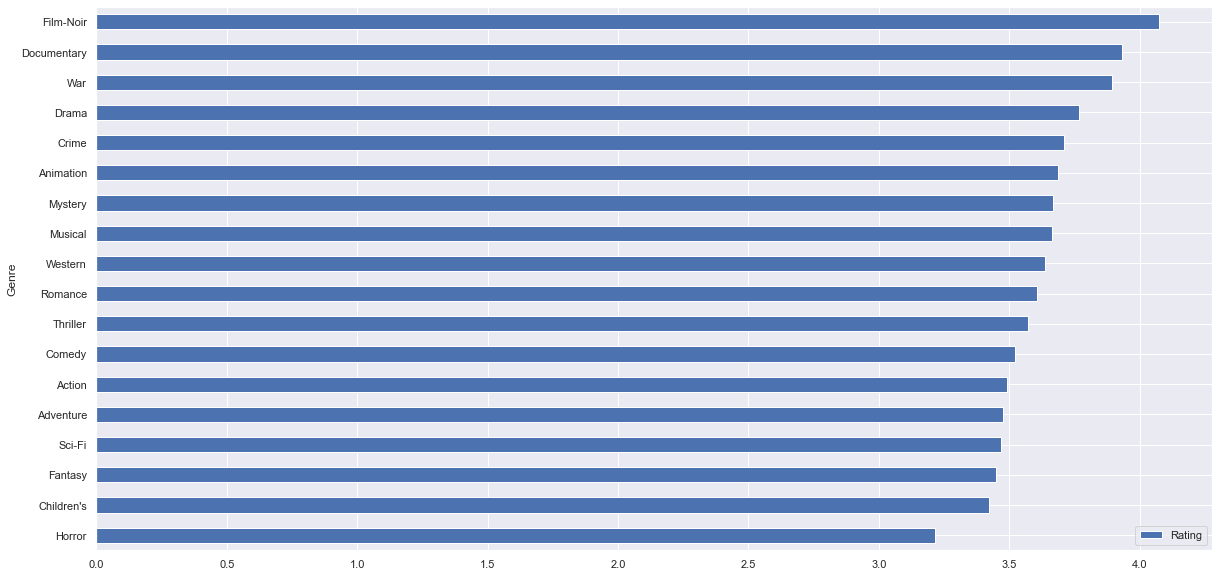

In [32]:
# Top genres among all users

user_genres_rating = []
for row in users_ratings[['UserID', 'Rating', 'Genres']].itertuples():
    for genre in row.Genres.split("|"):
        user_genres_rating.append({
            'UserID': row.UserID,
            'Rating': row.Rating,
            'Genre': genre
        })
user_genres_rating = pd.DataFrame(user_genres_rating)
plot_data = user_genres_rating[['Genre', 'Rating']].groupby("Genre").mean().sort_values(by='Rating')
print("Top genres among all users")
plot_data.plot.barh()

In [33]:
## Top-5 favorite genres for each user
print("Top-5 favorite genres for each user\n")
for user_id in np.random.choice(user_genres_rating.UserID.unique(), size=10):
    data = user_genres_rating[user_genres_rating.UserID == user_id][['Genre', 'Rating']]
    data = data.groupby("Genre").mean().sort_values(by='Rating')

    print(f"User: {user_id}, top-5 genres: {data.index[:5].tolist()}")

Top-5 favorite genres for each user

User: 1442, top-5 genres: ['Musical', "Children's", 'Animation', 'Comedy', 'Adventure']
User: 395, top-5 genres: ['Film-Noir', 'Mystery', 'Crime', 'Horror', 'Romance']
User: 5380, top-5 genres: ['Sci-Fi', 'Action', 'Comedy', 'Documentary', 'Musical']
User: 812, top-5 genres: ['Fantasy', 'Horror', 'Mystery', 'Comedy', "Children's"]
User: 2702, top-5 genres: ['Mystery', 'Thriller', 'Horror', 'Comedy', 'Sci-Fi']
User: 3912, top-5 genres: ['Comedy', 'Fantasy', "Children's", 'War', 'Animation']
User: 6032, top-5 genres: ['Western', 'Horror', 'Action', 'Adventure', 'Crime']
User: 767, top-5 genres: ['Fantasy', 'Film-Noir', 'Horror', 'Comedy', "Children's"]
User: 83, top-5 genres: ['Western', 'Horror', 'Mystery', 'Crime', 'Comedy']
User: 2200, top-5 genres: ["Children's", 'Musical', 'Mystery', 'Fantasy', 'Western']


In [34]:
# Plotting map of users
print("All users are from USA - we can not use it for using\n")

nomi = pgeocode.Nominatim('US')

users = pd.read_csv("../data/movielens-1m/ml-1m/users.csv")[['ZipCode']]
users['latitude'] = users['ZipCode'].apply(lambda x: nomi.query_postal_code(x)[9])
users['longitude'] = users['ZipCode'].apply(lambda x: nomi.query_postal_code(x)[10])

fig = px.scatter_mapbox(users, lat="latitude", lon="longitude", zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

All users are from USA - we can not use it for using

